In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv("sales_data_sample.csv",encoding="unicode_escape")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [4]:
todel=["ADDRESSLINE1","ADDRESSLINE2","STATE","PHONE"]
df=df.drop(columns=(todel),axis=1)

In [5]:
df["ORDERDATE"]=pd.to_datetime(df["ORDERDATE"])

In [6]:
import datetime as dt
snap=df["ORDERDATE"].max()+dt.timedelta(days=1)


In [7]:
df_rfm=df.groupby(["CUSTOMERNAME"]).agg({
    "ORDERDATE": lambda x:(snap-x.max()).days,
    "ORDERNUMBER":"count",
    "SALES":"sum"
})

df_rfm=df_rfm.rename(columns={
     "ORDERDATE": "frequency",
    "ORDERNUMBER":"recency",
    "SALES":"montary_value"
})

In [8]:
df_rfm.head()

,frequency,recency,montary_value
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


In [9]:
data=np.log(df_rfm)
data.head()

,frequency,recency,montary_value
CUSTOMERNAME,,,
"AV Stores, Co.",5.278115,3.931826,11.969133
Alpha Cognac,4.174387,2.995732,11.163204
Amica Models & Co.,5.579730,3.258097,11.452297
"Anna's Decorations, Ltd",4.430817,3.828641,11.944683
Atelier graphique,5.236442,1.945910,10.093279


In [10]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(data)
scaler=ss.transform(data)

In [11]:
from sklearn.cluster import KMeans 

sse={}

for k in range(1,21):
    kmeans=KMeans(n_clusters=k,random_state=1)
    kmeans.fit(scaler)
    sse[k]=kmeans.inertia_

d:\ML\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\ML\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\ML\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\ML\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

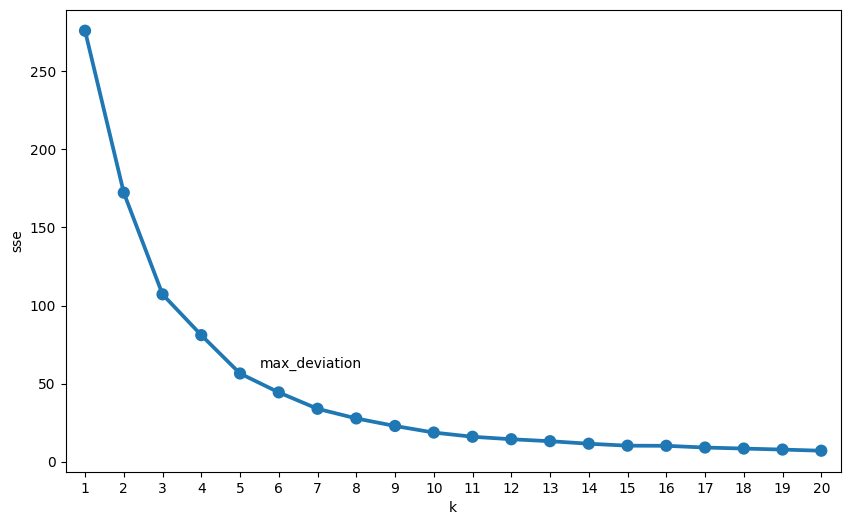

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.xlabel("k")
plt.ylabel("sse")
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))
plt.text(4.5,60,"max_deviation")
plt.show()
plt.style.use("ggplot")

In [13]:
kmeans=KMeans(n_clusters=5,random_state=1)
kmeans.fit(scaler)

d:\ML\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\ML\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=1)

In [16]:
df_rfm.head()

,frequency,recency,montary_value,cluster
CUSTOMERNAME,,,,
"AV Stores, Co.",196,51,157807.81,1
Alpha Cognac,65,20,70488.44,2
Amica Models & Co.,265,26,94117.26,2
"Anna's Decorations, Ltd",84,46,153996.13,1
Atelier graphique,188,7,24179.96,0


In [17]:
df_rfm["cluster"]=kmeans.labels_
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,NYC,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,Reims,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,Paris,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,Pasadena,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,54,S72_3212,Euro Shopping Channel,Madrid,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,54,S72_3212,"Oulu Toy Supplies, Inc.",Oulu,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,54,S72_3212,Euro Shopping Channel,Madrid,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,54,S72_3212,Alpha Cognac,Toulouse,31000,France,EMEA,Roulet,Annette,Small


In [19]:
df_rfm['cluster'].value_counts()

cluster
2    43
1    31
0    12
4     4
3     2
Name: count, dtype: int64

In [21]:
from sklearn.cluster import AgglomerativeClustering


In [26]:
agg=AgglomerativeClustering(n_clusters=5)
agg.fit(scaler)
agg.labels_

array([0, 0, 1, 0, 3, 0, 0, 1, 1, 0, 3, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 4, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       2, 0, 0, 1, 1, 1, 3, 1, 0, 1, 0, 4, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0,
       0, 0, 1, 3, 0, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1], dtype=int64)

In [27]:
df_rfm["cluster_hei"]=agg.labels_

In [28]:
df_rfm.head()

,frequency,recency,montary_value,cluster,cluster_hei
CUSTOMERNAME,,,,,
"AV Stores, Co.",196,51,157807.81,1,0
Alpha Cognac,65,20,70488.44,2,0
Amica Models & Co.,265,26,94117.26,2,1
"Anna's Decorations, Ltd",84,46,153996.13,1,0
Atelier graphique,188,7,24179.96,0,3


In [30]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN().fit(scaler)
dbs.labels_


array([ 0,  2,  1,  1, -1, -1,  0, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
        1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  0,  2,  1,  1,  1, -1,
       -1,  2,  1,  1, -1,  1,  1,  0,  1,  1,  1,  1,  1, -1,  2,  1,  0,
        1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [31]:
df_rfm["cluster_dbs"]=dbs.labels_